# Hands-on Activity 5.2: Build and Apply Multilayer Perceptron
BUENAFE, LORENZ ANGELO N. <br>
1915058 <br>
CPE 019 - CPE32S9

# Problem:
Based on the dataset that I used, I am trying to forecast or predict the number of car sales every 6 months and the following years by using MLP. <br>

Dataset used: https://drive.google.com/file/d/17j7CPYUPuGcfxBSSOUrhCOHx41o80q9E/view?usp=sharing

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt;
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import warnings
warnings.filterwarnings('ignore')

In [34]:
path=('/content/drive/MyDrive/CPE 019 Emerging Technologies 3/HOA 5.2/sales-cars.csv')
df_cars = pd.read_csv(path)

In [35]:
df_cars.head()


,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [36]:
df_cars.index = pd.to_datetime(df_cars.Month, format='%Y-%m')


In [37]:
df_cars = df_cars.resample("M").sum()


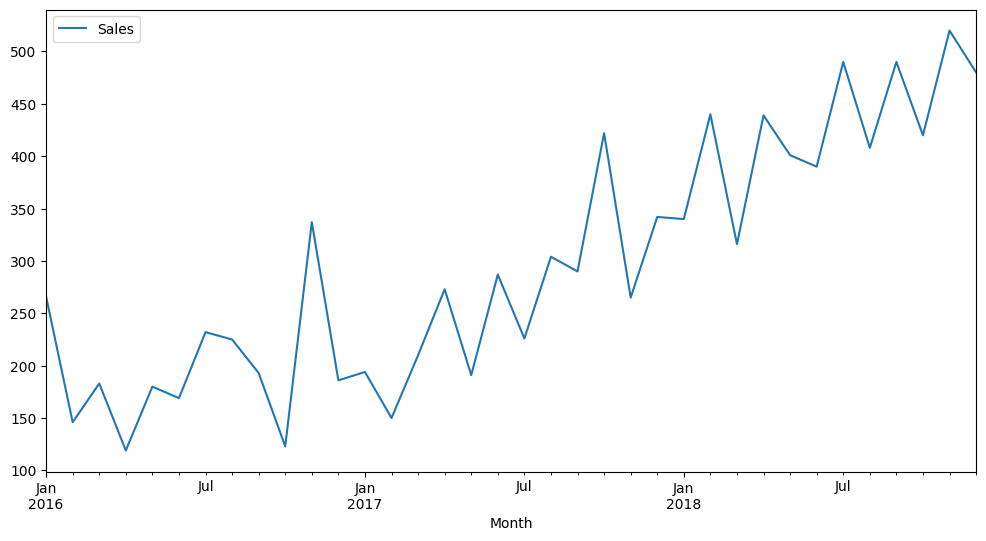

In [38]:
df_cars.plot(figsize=(12,6)); #cell 8 and 9 was for tidying up the appearance of months particularly January to July and the subsequent years.

In [39]:
# Train Test Split
train = df_cars[:-6]
test = df_cars[-6:]

In [40]:
train.head()

,Sales
Month,
2016-01-31,266
2016-02-29,146
2016-03-31,183
2016-04-30,119
2016-05-31,180


In [41]:
test.head()

,Sales
Month,
2018-07-31,490
2018-08-31,408
2018-09-30,490
2018-10-31,420
2018-11-30,520


In [42]:
#generate lags
def generate_lag(df, n):
    X, y = [], []
    for i in range(len(df) - n):
        X.append(df[i:i+n])
        y.append(df[n+i])

    return np.array(X), np.array(y), np.array(y[-n:]).reshape(1,n)

In [43]:
X, y, last_batch_values = generate_lag(train.Sales.values, 12)

In [44]:
X

array([[266, 146, 183, 119, 180, 169, 232, 225, 193, 123, 337, 186],
       [146, 183, 119, 180, 169, 232, 225, 193, 123, 337, 186, 194],
       [183, 119, 180, 169, 232, 225, 193, 123, 337, 186, 194, 150],
       [119, 180, 169, 232, 225, 193, 123, 337, 186, 194, 150, 210],
       [180, 169, 232, 225, 193, 123, 337, 186, 194, 150, 210, 273],
       [169, 232, 225, 193, 123, 337, 186, 194, 150, 210, 273, 191],
       [232, 225, 193, 123, 337, 186, 194, 150, 210, 273, 191, 287],
       [225, 193, 123, 337, 186, 194, 150, 210, 273, 191, 287, 226],
       [193, 123, 337, 186, 194, 150, 210, 273, 191, 287, 226, 304],
       [123, 337, 186, 194, 150, 210, 273, 191, 287, 226, 304, 290],
       [337, 186, 194, 150, 210, 273, 191, 287, 226, 304, 290, 422],
       [186, 194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265],
       [194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342],
       [150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342, 340],
       [210, 273, 191, 287, 226, 3

In [45]:
y

array([194, 150, 210, 273, 191, 287, 226, 304, 290, 422, 265, 342, 340,
       440, 316, 439, 401, 390])

In [46]:
last_batch_values

array([[226, 304, 290, 422, 265, 342, 340, 440, 316, 439, 401, 390]])

# Creating the model

In [47]:
def mlp_model(input_, y_, epochs=1000):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=input_.shape[1]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    print(model.fit(input_, y_, epochs=epochs))
    return model

In [48]:
model = mlp_model(X,y, epochs=370)
model


Epoch 1/370
1/1 [==============================] - 1s 570ms/step - loss: 91195.3906
Epoch 2/370
1/1 [==============================] - 0s 11ms/step - loss: 78907.2188
Epoch 3/370
1/1 [==============================] - 0s 10ms/step - loss: 67474.3516
Epoch 4/370
1/1 [==============================] - 0s 13ms/step - loss: 56977.9219
Epoch 5/370
1/1 [==============================] - 0s 14ms/step - loss: 47440.3516
Epoch 6/370
1/1 [==============================] - 0s 11ms/step - loss: 38920.6250
Epoch 7/370
1/1 [==============================] - 0s 10ms/step - loss: 31385.3789
Epoch 8/370
1/1 [==============================] - 0s 12ms/step - loss: 24796.7852
Epoch 9/370
1/1 [==============================] - 0s 11ms/step - loss: 19208.9531
Epoch 10/370
1/1 [==============================] - 0s 11ms/step - loss: 14578.6338
Epoch 11/370
1/1 [==============================] - 0s 13ms/step - loss: 10862.2695
Epoch 12/370
1/1 [==============================] - 0s 10ms/step - loss: 8035.8369
E

In [49]:
#forecast
def forecast_function(model, last_batch, n):
    in_value = last_batch.copy()
    preds = []
    for i in range(n):
        p = model.predict(in_value)
        preds.append(p.ravel())
        in_value = np.append(in_value, p)[1:].reshape(last_batch.shape)
    return np.array(preds).ravel()

In [50]:
pred = forecast_function(model, last_batch_values, 6)

1/1 [==============================] - 0s 35ms/step


In [51]:
pred

array([446.093  , 468.80255, 507.66254, 452.39258, 545.29425, 534.06464],
      dtype=float32)

In [52]:
test['Predicted_Sales']=pred

In [53]:
test.head()

,Sales,Predicted_Sales
Month,,
2018-07-31,490,446.092987
2018-08-31,408,468.802551
2018-09-30,490,507.662537
2018-10-31,420,452.392578
2018-11-30,520,545.294250


<Axes: xlabel='Month'>

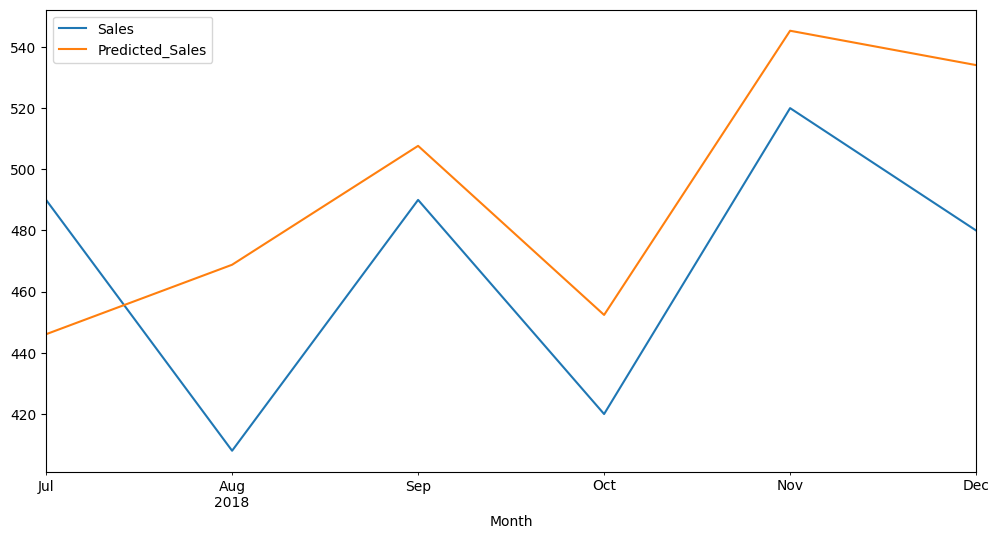

In [54]:
#shows the difference between the Sales and Predicted Sales
test.plot(figsize=(12,6))


# Accuracy

In [55]:
def error_function(df,column_1,column_2):
    data = df.copy()
    my_list = []
    for i in range(len(data)):
        x = (data[column_2][i]*100)/data[column_1][i]
        if x >= 100:
            error = x-100
            #data['error_percentage'][i] = error
            my_list.append(error)
        else:
            error = 100-x
            my_list.append(error)
            #data['error_percentage'][i] = error
    data['error_percentage'] = my_list
    return data

In [56]:
column_1 = 'Sales'
column_2 = 'Predicted_Sales'
df_new = error_function(test,column_1,column_2)

In [57]:
df_new

,Sales,Predicted_Sales,error_percentage
Month,,,
2018-07-31,490,446.092987,8.960615
2018-08-31,408,468.802551,14.902586
2018-09-30,490,507.662537,3.604599
2018-10-31,420,452.392578,7.712519
2018-11-30,520,545.294250,4.864279
2018-12-31,480,534.064636,11.263466


In [58]:
def mean_error(df,error_column):
    total = 0
    for i in range(len(df)):
        total += df[error_column][i]
    mean_error_ = total/(len(df))
    return mean_error_

In [59]:
error_rate = mean_error(df_new,'error_percentage')

In [60]:
error_rate

8.551343952349256

In [61]:
sum_of_actual_sales = sum(df_new.Sales.values)

In [62]:
sum_of_actual_sales

2808

In [63]:
sum_of_predicted_sales = sum(df_new.Predicted_Sales.values)

In [64]:
sum_of_predicted_sales

2954.309539794922

In [65]:
rate_of_actual_and_predict_sums = (sum_of_predicted_sales*100)/sum_of_actual_sales

In [66]:
if rate_of_actual_and_predict_sums >= 100:
    total_percentage = rate_of_actual_and_predict_sums - 100
else:
    total_percentage = 100-rate_of_actual_and_predict_sums

In [67]:
print('Percentage error: ',total_percentage)

Percentage error:  5.21045369640035
